# Input dataset from Google Drive and import Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
# library
import numpy as np
import pandas as pd
import os
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Activation
import os
import cv2

In [3]:
%cd /content/drive/MyDrive/Colab_Notebooks/42028/AT1/dataset

/content/drive/MyDrive/Colab_Notebooks/42028/AT1/dataset


In [4]:
ls

'!'/  ')'/   +/   -/  '='/   ]/   cos/   lim/   log/   times/


In [5]:
os.listdir('/content/drive/MyDrive/Colab_Notebooks/42028/AT1/dataset')

['!', ')', '+', '-', '=', ']', 'cos', 'lim', 'log', 'times']

# Visualizing dataset

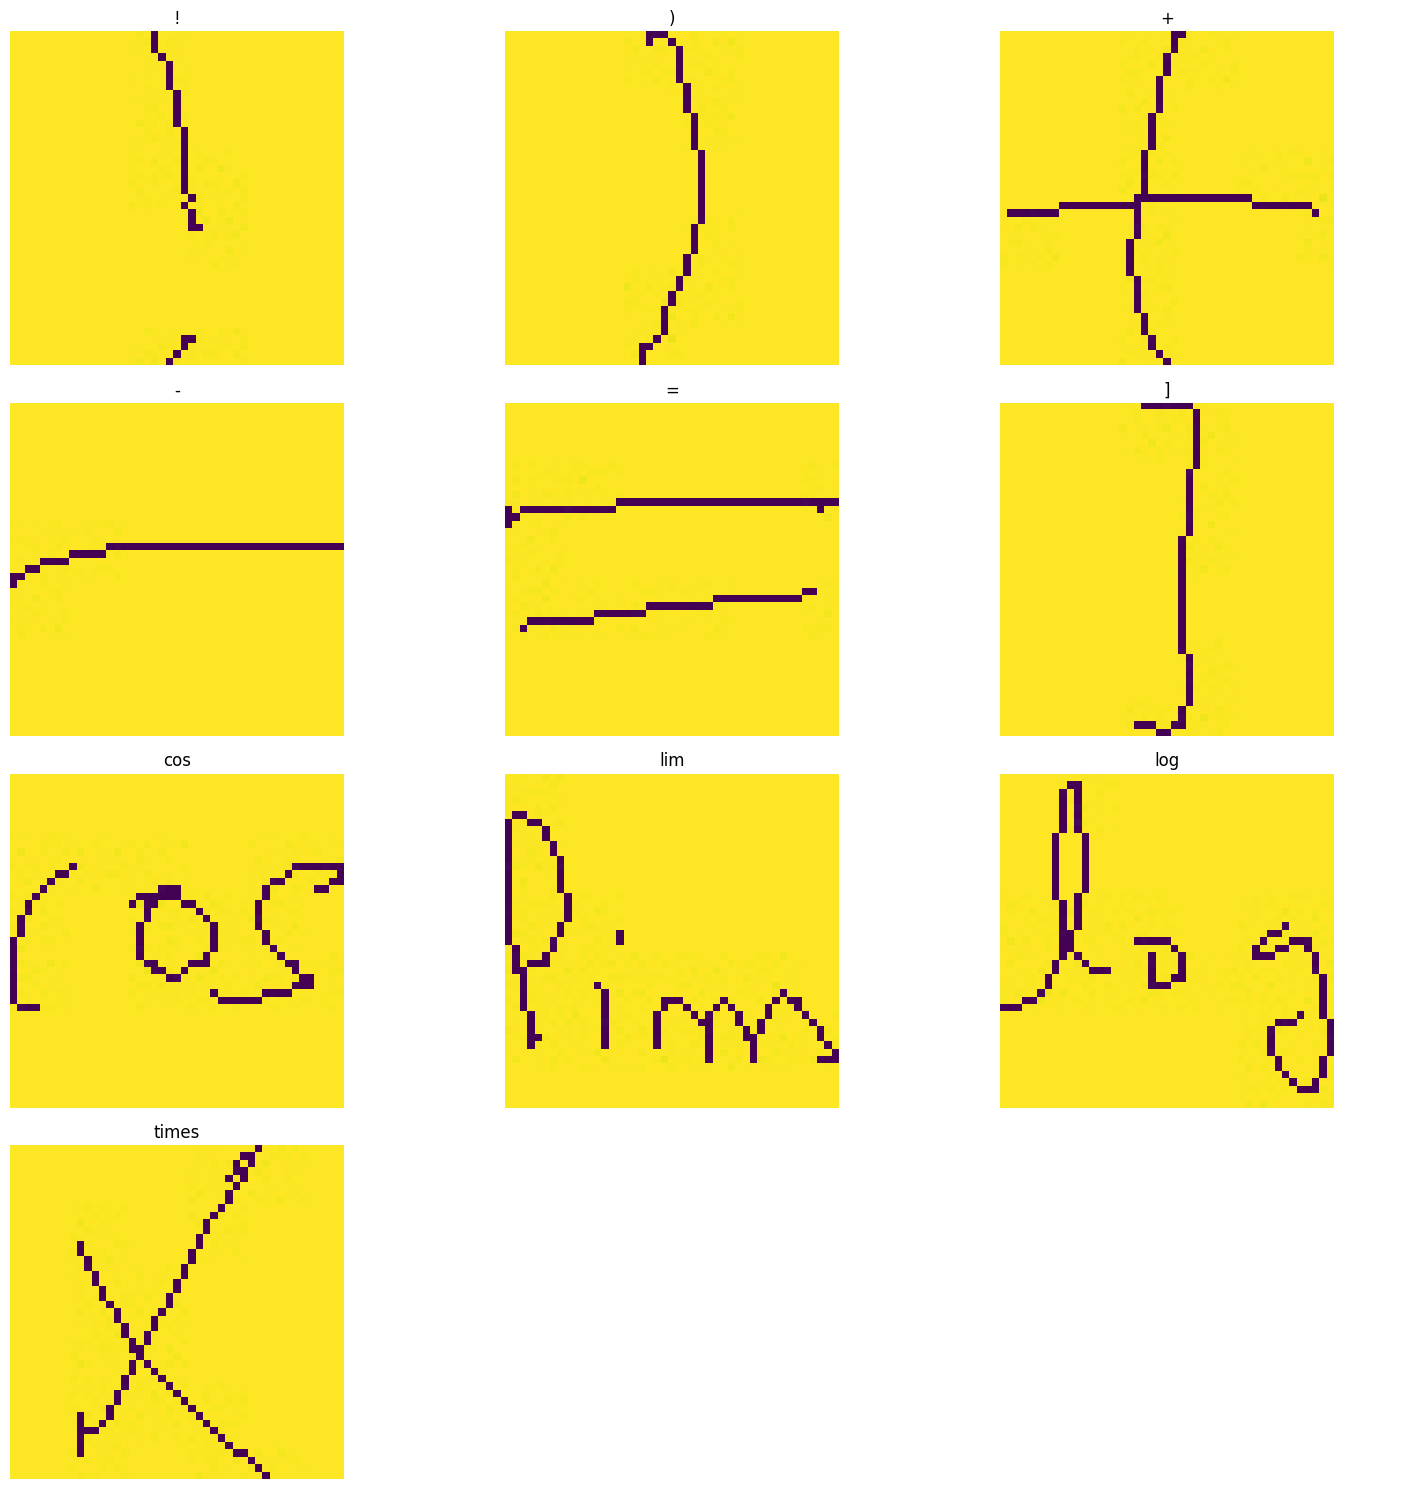

In [ ]:
import random
import matplotlib.image as mpimg

#define dataset path
dataset_path = '/content/drive/MyDrive/Colab_Notebooks/42028/AT1/dataset'

# Get a list of categories
categories = os.listdir(dataset_path)

# Set the number of images displayed in each row
num_columns = 3

# Count rows
num_rows = len(categories) // num_columns
if len(categories) % num_columns != 0:
    num_rows += 1

# Create subgraph
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))

# Go through each category and randomly select an image to visualize
for i, cls in enumerate(categories):
    # Get category path
    category_path = os.path.join(dataset_path, cls)
    # Get all images in this category
    images = os.listdir(category_path)
    # If there are no images in this category, skip it
    if len(images) == 0:
        continue
    # randomly select an image
    random_image = random.choice(images)
    # Image path
    image_path = os.path.join(category_path, random_image)
    # Read and display images
    img = mpimg.imread(image_path)
    row = i // num_columns
    col = i % num_columns
    if num_rows == 1:
        axes[col].imshow(img)
        axes[col].set_title(cls)
        axes[col].axis('off')
    else:
        axes[row, col].imshow(img)
        axes[row, col].set_title(cls)
        axes[row, col].axis('off')

# If the last row is not filled with images, hide the remaining sub-images
if len(categories) % num_columns != 0:
    for j in range(len(categories) % num_columns, num_columns):
        axes[num_rows - 1, j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


# Read the images file from dataset



In [6]:
# Read the image file paths in the dataset and store them in a list
from pathlib import Path
from tqdm import tqdm

dataset_path = Path('/content/drive/MyDrive/Colab_Notebooks/42028/AT1/dataset')
labels_data = []
images_data = []

for label_path in tqdm(dataset_path.glob('*')):
    label = label_path.name
    for file_path in label_path.glob('*'):
        image = cv2.imread(str(file_path))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        images_data.append(image)
        labels_data.append(label)


10it [01:56, 11.60s/it]


In [ ]:
images_data[:10] #Print the first ten data in the dataset

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

In [8]:
len(images_data) #Confirm that the dataset is not missing

5000

#Create int Label





In [7]:
# Convert category names to numbers, Because neural networks can only accept numeric types
labelNames = {'!': 0,')': 1,'+': 2,'-': 3,'=': 4,']': 5,'cos': 6,'lim': 7,'log': 8,'times': 9}

In [9]:
print(labels_data)

['!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!', '!',

In [10]:
numeric_labels = []

for label in labels_data:
    numeric_label = labelNames[label]
    numeric_labels.append(numeric_label)

print(numeric_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Splitting the dataset

In [11]:
from sklearn.model_selection import train_test_split

# Split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(images_data, labels_data, test_size=0.2, random_state=0)

# Split the validation set again
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

print("Training set size:", np.shape(X_train))
print("Test set size:",  np.shape(X_test))
print("Validation set size:", np.shape(X_val))

Training set size: (4000, 45, 45)
Test set size: (500, 45, 45)
Validation set size: (500, 45, 45)


# LBP

In [12]:
# initialize the data matrix and labels
import cv2
from skimage import feature
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius

	def LBPfeatures(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints,
			self.radius, method="uniform")
    # Form the histogram
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))

		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)

		# return the histogram of Local Binary Patterns
		return hist


In [13]:
# Create an object of LocalBinaryPatterns class and initial the parameters.
def lbp_convert(images_data,numeric_labels):
  desc = LocalBinaryPatterns(24, 8)
  data_LBPtrain = []
  labels_LBPtrain = []
  # loop over the training images
  for img_index in range(len(images_data)):
    # load the train image, and extract LBP features
    image = images_data[img_index]
    hist = desc.LBPfeatures(image) #Call LBPfeatures in class localBinaryPatterns
    # extract the label from the image path, then update the
    # label and data lists
    labels_LBPtrain.append(numeric_labels[img_index])
    data_LBPtrain.append(hist)
  return np.array(data_LBPtrain),np.array(labels_LBPtrain)

In [14]:
image_train, label_train= lbp_convert(X_train,y_train)
image_test, label_test= lbp_convert(X_test,y_test)
image_val, label_val= lbp_convert(X_val,y_val)

In [15]:
np.shape(image_train)

(4000, 26)

# Covert List to Array

In [16]:
type(X_train)

list

In [17]:
demo_image = X_test

In [18]:
# Before using TensorFlow to build and train a neural network model, you need to convert the training set, test set, and validation set into arrays.
X_train = np.array(image_train)
X_test = np.array(image_test)
X_val = np.array(image_val)

y_train = np.array(label_train)
y_test = np.array(label_test)
y_val = np.array(label_val)

In [19]:
type(X_train)

numpy.ndarray

# Training Model

## Training ANN Model

In [20]:
print("Training set size:", np.shape(X_train))

Training set size: (4000, 26)


In [21]:
len(np.unique(y_train))

10

In [22]:
y_val[:2]

array(['lim', ']'], dtype='<U5')

In [23]:
import tensorflow as tf
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[26]),
                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                    tf.keras.layers.Dense(32, activation=tf.nn.relu),
                    tf.keras.layers.Dense(len(np.unique(y_train)), activation=tf.nn.softmax)
                                    ])


In [24]:
np.shape(X_train),np.shape(y_train)

((4000, 26), (4000,))

In [25]:
np.shape(X_train)

(4000, 26)

In [26]:
y_train

array([']', 'cos', ')', ..., '-', ']', ']'], dtype='<U5')

In [27]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_train

array([5, 6, 1, ..., 3, 5, 5])

In [28]:
y_val_encoded = label_encoder.transform(y_val)

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_val, y_val_encoded), batch_size = 100,epochs = 20)

Epoch 1/20
40/40 [==============================] - 2s 13ms/step - loss: 2.1322 - accuracy: 0.1935 - val_loss: 1.7724 - val_accuracy: 0.3040
Epoch 2/20
40/40 [==============================] - 0s 9ms/step - loss: 1.5637 - accuracy: 0.3440 - val_loss: 1.4322 - val_accuracy: 0.3960
Epoch 3/20
40/40 [==============================] - 0s 9ms/step - loss: 1.4556 - accuracy: 0.3835 - val_loss: 1.3507 - val_accuracy: 0.4180
Epoch 4/20
40/40 [==============================] - 0s 9ms/step - loss: 1.4401 - accuracy: 0.3902 - val_loss: 1.3915 - val_accuracy: 0.3860
Epoch 5/20
40/40 [==============================] - 0s 9ms/step - loss: 1.4066 - accuracy: 0.4200 - val_loss: 1.3263 - val_accuracy: 0.4560
Epoch 6/20
40/40 [==============================] - 0s 9ms/step - loss: 1.4160 - accuracy: 0.4135 - val_loss: 1.3439 - val_accuracy: 0.4880
Epoch 7/20
40/40 [==============================] - 0s 9ms/step - loss: 1.3891 - accuracy: 0.4272 - val_loss: 1.3130 - val_accuracy: 0.4740
Epoch 8/20
40/40 [=

## Evaluation of ANN Model

In [30]:
y_pred = model.predict(X_test)
y_pred_list = []
for i in range(len(y_pred)):
  y_temp_pred = np.argmax(y_pred[i])
  y_pred_list.append(y_temp_pred)
y_pred_list[:10]

16/16 [==============================] - 0s 2ms/step


[8, 0, 6, 1, 0, 6, 5, 7, 8, 8]

In [31]:
# Convert y_test to numeric labels
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)

[[37  3  0  8  0  2  0  0  0  0]
 [ 0 45  2  1  0  4  2  0  0  0]
 [ 0  1 37  0  0  1  1  2  3  0]
 [ 6  7  0 40  0  0  0  0  0  0]
 [ 0  5  2  1  8  1 11  4 10  0]
 [ 0 12  1  1  0 48  0  0  0  0]
 [ 0  2  0  0  2  0 32  0  3  4]
 [ 0  0  5  0  6  0  6  9 21  0]
 [ 0  0  6  0  2  0  0  4 32  2]
 [ 0  0  0  0  4  0 11  0  2 41]]


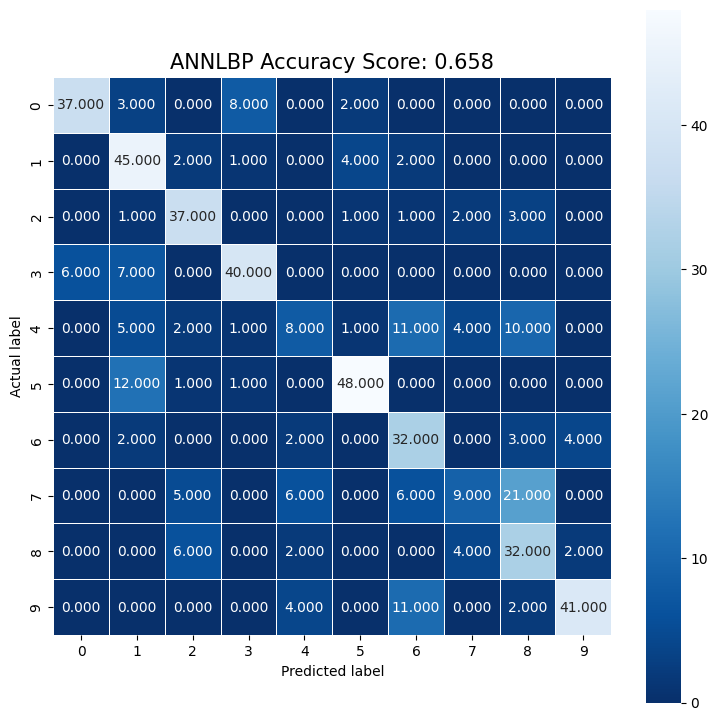

In [32]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
# plot the confusion matrix
cm  = metrics.confusion_matrix(y_test_numeric, y_pred_list)
print(cm)

test_acc = accuracy_score(y_test_numeric, y_pred_list)
# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'ANNLBP Accuracy Score: {0}'.format(test_acc)
plt.title(all_sample_title, size = 15);

## Visualize results

In [33]:
labelNames

{'!': 0,
 ')': 1,
 '+': 2,
 '-': 3,
 '=': 4,
 ']': 5,
 'cos': 6,
 'lim': 7,
 'log': 8,
 'times': 9}

In [34]:
labelNames = ['!',')','+','-','=',']','cos','lim','log','times']

In [35]:
type(y_test)

numpy.ndarray

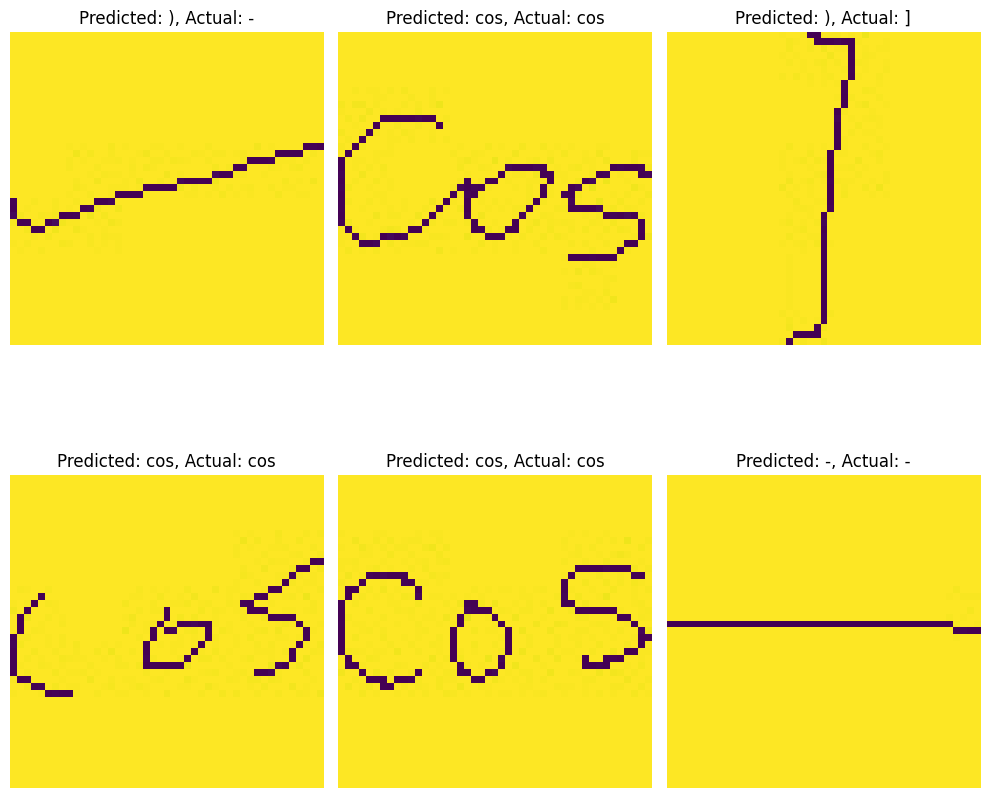

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 9 different random indexes
random_indices = np.random.choice(50, 6, replace=False)

# Visualizing images using Matplotlib
plt.figure(figsize=(10, 10))

# Go through and display the image corresponding to each randomly selected index
for i, idx in enumerate(random_indices):
    predicted_label_idx = np.argmax(y_pred[idx])
    predicted_label = labelNames[predicted_label_idx]
    plt.subplot(2, 3, i+1)  # Create a 3x3 grid
    plt.imshow(demo_image[idx])
    plt.title(f'Predicted: {predicted_label}, Actual: {y_test[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## SVM Model

In [37]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


#SVM models
SVM = SVC(kernel='linear', C=10000.0, gamma='auto')
SVM.fit(image_train,label_train)
y_pred = SVM.predict(image_test)
# Calculate accuracy score
test_accuracy = accuracy_score(label_test, y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.794


In [38]:
y_val_pred = SVM.predict(image_val)
val_accuracy = accuracy_score(label_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.81


## Evaluation of SVM Model

[[40  0  0  9  0  1  0  0  0  0]
 [ 0 50  2  1  0  1  0  0  0  0]
 [ 0  0 40  0  2  0  1  2  0  0]
 [ 5  3  0 45  0  0  0  0  0  0]
 [ 0  2  0  2 31  0  3  0  1  3]
 [ 0  9  0  0  1 52  0  0  0  0]
 [ 0  2  1  0  1  0 33  2  4  0]
 [ 0  0  0  0  5  0  8 22 11  1]
 [ 0  0  3  0  7  0  0  5 31  0]
 [ 0  0  1  0  3  0  0  0  1 53]]


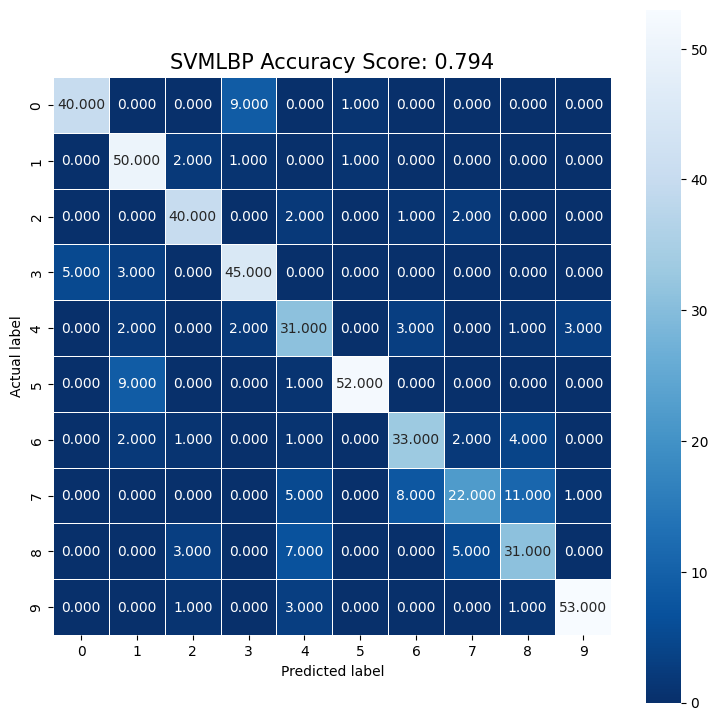

In [39]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
import seaborn as sns
# plot the confusion matrix
cm  = metrics.confusion_matrix(label_test, y_pred)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'SVMLBP Accuracy Score: {0}'.format(test_accuracy)
plt.title(all_sample_title, size = 15);

## Visualize results

In [40]:
labelNames

['!', ')', '+', '-', '=', ']', 'cos', 'lim', 'log', 'times']

In [41]:
labelNames = ['!',')','+','-','=',']','cos','lim','log','times']

In [42]:
type(y_test)

numpy.ndarray

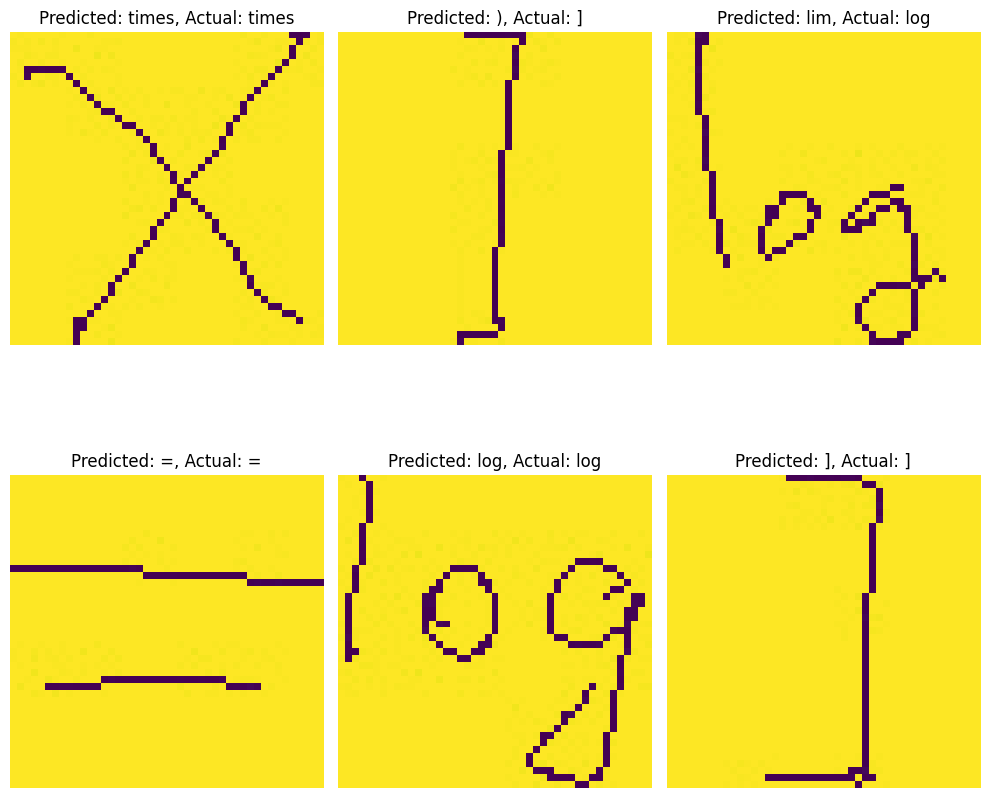

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 9 different random indexes
random_indices = np.random.choice(100, 6, replace=False)

# Visualizing images using Matplotlib
plt.figure(figsize=(10, 10))

# Go through and display the image corresponding to each randomly selected index
for i, idx in enumerate(random_indices):
    predicted_label = y_pred[idx]  # Directly use the label returned by SVM as the predicted label
    plt.subplot(2, 3, i+1)  # Create a 3x3 grid
    plt.imshow(demo_image[idx])
    plt.title(f'Predicted: {predicted_label}, Actual: {y_test[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()
